In [1]:
"""
Purpose: To Run the proofreading of neurons in the 
test set and measure the precision and recall of the new rules



"""

'\nPurpose: To Run the proofreading of neurons in the \ntest set and measure the precision and recall of the new rules\n\n\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-24 19:32:59,501 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 19:32:59,503 - settings - Setting database.user to celiib
INFO - 2021-04-24 19:32:59,503 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 19:32:59,506 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-24 19:32:59,507 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 19:32:59,519 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-24 19:32:59,991 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 19:32:59,994 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 19:32:59,995 - settings - Setting database.user to celiib
INFO - 2021-04-24 19:32:59,995 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 19:32:59,996 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 19:32:59,996 - settings - Setting database.user to celiib
INFO - 2021-04-24 19:32:59,997 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 19:32:59,998 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 19:33:00,442 - settings - Setting enable_python_native_blobs to True


In [4]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-24 19:33:00,588 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 19:33:00,589 - settings - Setting database.user to celiib
INFO - 2021-04-24 19:33:00,590 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 19:33:00,592 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 19:33:01,079 - settings - Setting enable_python_native_blobs to True


In [5]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Runnig the validation

In [6]:
"""
Psueodocode: 
1) Pull down the segment ids of the valid neurons

For each neuron
1) Dwonload the neuron object
2) Run the Proofreading
3) Print out the validation plot
4) Save the validation df

"""

'\nPsueodocode: \n1) Pull down the segment ids of the valid neurons\n\nFor each neuron\n1) Dwonload the neuron object\n2) Run the Proofreading\n3) Print out the validation plot\n4) Save the validation df\n\n'

In [7]:
segment_ids = minnie.AutoProofreadValidationBorderNeurons().fetch("segment_id")

In [8]:
job_idx = 2
job_step = 5
segments_to_process = segment_ids[job_idx*job_step:(job_idx+1)*job_step]
segments_to_process

array([864691136008425132, 864691135865518469, 864691135945413668,
       864691136003930314, 864691136194042326])


--- Working on Neuron 864691136008425132 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate [448259.32162313 929180.42227274 595240.52885951]--------
coordinate [448259.32162313 929180.42227274 595240.52885951] had error branches []--------


 ----- Working on coordinate [454872.55702616 942312.43796309 625067.76186852]--------
coordinate [454872.55702616 942312.43796309 625067.76186852] had error branches []--------


 ----- Working on coordinate [455453.60028452 951632.94334923 635549.81113486]--------
coordinate [455453.60028452 951632.94334923 635549.81113486] had error branches []--------


 ----- Working on coordinate [455889.24925506 955155.01994705 639144.98788184]--------
coordinate [455889.24925506 955155.01994705 639144.98788184] had error branches []--------


 ----- Working on coordinate [478847.86051971 974988.29505019 662321.9266523 ]--------
coordinate [478847.86051971 974988.29505019 662321.9266523 ] had error branches []------

coordinate [ 725423.8 1047550.   751619.1] had error branches [104, 105, 106, 138, 139, 153, 154, 200, 202, 225, 226, 238, 242, 253, 262, 252, 257, 260, 263, 265, 286, 291, 292, 295, 282, 281, 284, 302, 269, 274, 278, 279, 280, 287, 288, 298, 304, 305, 306, 300, 308, 297, 307, 312, 321, 323, 313, 316, 332, 335]--------


 ----- Working on coordinate [ 725914.38654152 1032587.53388164  776829.98478794]--------
coordinate [ 725914.38654152 1032587.53388164  776829.98478794] had error branches [104, 105, 106, 138, 139, 153, 154, 200, 202, 225, 226, 238, 242, 253, 262, 252, 257, 260, 263, 265, 286, 291, 292, 295, 282, 281, 284, 302, 269, 274, 278, 279, 280, 287, 288, 298, 304, 305, 306, 300, 308, 297, 307, 312, 321, 323, 313, 316, 332, 335, 326, 336]--------


 ----- Working on coordinate [ 726121.99400515 1028476.7113116   738376.51103441]--------
coordinate [ 726121.99400515 1028476.7113116   738376.51103441] had error branches [104, 105, 106, 138, 139, 153, 154, 200, 202, 225, 226, 238,

coordinate [ 746663.93222836 1026923.72711706  744321.21815278] had error branches [104, 105, 106, 138, 139, 153, 154, 200, 202, 225, 226, 238, 242, 253, 262, 252, 257, 260, 263, 265, 286, 291, 292, 295, 282, 281, 284, 302, 269, 274, 278, 279, 280, 287, 288, 298, 304, 305, 306, 300, 308, 297, 307, 312, 321, 323, 313, 316, 332, 335, 326, 336, 333, 342, 341, 327, 298, 275, 361, 367, 351, 377, 372, 345, 358, 368, 373, 381, 388, 389, 391, 397, 398, 385, 406, 392, 393, 394, 401, 411, 350, 413, 414, 422, 440, 449, 448, 451, 427, 445, 462]--------


 ----- Working on coordinate [ 747832.99284745 1025929.10849427  734896.43112623]--------
coordinate [ 747832.99284745 1025929.10849427  734896.43112623] had error branches [104, 105, 106, 138, 139, 153, 154, 200, 202, 225, 226, 238, 242, 253, 262, 252, 257, 260, 263, 265, 286, 291, 292, 295, 282, 281, 284, 302, 269, 274, 278, 279, 280, 287, 288, 298, 304, 305, 306, 300, 308, 297, 307, 312, 321, 323, 313, 316, 332, 335, 326, 336, 333, 342, 341, 32

coordinate [ 782903.34964184 1036411.2623455   776377.01221236] had error branches [104, 105, 106, 138, 139, 153, 154, 200, 202, 225, 226, 238, 242, 253, 262, 252, 257, 260, 263, 265, 286, 291, 292, 295, 282, 281, 284, 302, 269, 274, 278, 279, 280, 287, 288, 298, 304, 305, 306, 300, 308, 297, 307, 312, 321, 323, 313, 316, 332, 335, 326, 336, 333, 342, 341, 327, 298, 275, 361, 367, 351, 377, 372, 345, 358, 368, 373, 381, 388, 389, 391, 397, 398, 385, 406, 392, 393, 394, 401, 411, 350, 413, 414, 422, 440, 449, 448, 451, 427, 445, 462, 470, 473, 475, 447, 462, 474, 477, 478, 482, 483, 484, 980, 981, 489, 493, 498, 504, 505, 506, 507, 512, 513, 514, 516, 984, 985, 979, 523, 527, 531, 520, 537, 496, 526, 539, 542, 548, 549, 553, 554, 555, 556]--------


 ----- Working on coordinate [ 787934.13687915 1037000.59219174  821440.26058906]--------
coordinate [ 787934.13687915 1037000.59219174  821440.26058906] had error branches [104, 105, 106, 138, 139, 153, 154, 200, 202, 225, 226, 238, 242, 25

coordinate [ 865143.04137721 1034059.12463637  916626.96731453] had error branches [104, 105, 106, 138, 139, 153, 154, 200, 202, 225, 226, 238, 242, 253, 262, 252, 257, 260, 263, 265, 286, 291, 292, 295, 282, 281, 284, 302, 269, 274, 278, 279, 280, 287, 288, 298, 304, 305, 306, 300, 308, 297, 307, 312, 321, 323, 313, 316, 332, 335, 326, 336, 333, 342, 341, 327, 298, 275, 361, 367, 351, 377, 372, 345, 358, 368, 373, 381, 388, 389, 391, 397, 398, 385, 406, 392, 393, 394, 401, 411, 350, 413, 414, 422, 440, 449, 448, 451, 427, 445, 462, 470, 473, 475, 447, 462, 474, 477, 478, 482, 483, 484, 980, 981, 489, 493, 498, 504, 505, 506, 507, 512, 513, 514, 516, 984, 985, 979, 523, 527, 531, 520, 537, 496, 526, 539, 542, 548, 549, 553, 554, 555, 556, 559, 560, 571, 572, 593, 597, 591, 601, 605, 598, 614, 615, 617, 631, 632, 629, 641, 973]--------


 ----- Working on coordinate [ 871213.5 1034697.   923493.6]--------
coordinate [ 871213.5 1034697.   923493.6] had error branches [104, 105, 106, 138,

coordinate [ 953989.46876223 1034602.46306035  960060.35039486] had error branches [104, 105, 106, 138, 139, 153, 154, 200, 202, 225, 226, 238, 242, 253, 262, 252, 257, 260, 263, 265, 286, 291, 292, 295, 282, 281, 284, 302, 269, 274, 278, 279, 280, 287, 288, 298, 304, 305, 306, 300, 308, 297, 307, 312, 321, 323, 313, 316, 332, 335, 326, 336, 333, 342, 341, 327, 298, 275, 361, 367, 351, 377, 372, 345, 358, 368, 373, 381, 388, 389, 391, 397, 398, 385, 406, 392, 393, 394, 401, 411, 350, 413, 414, 422, 440, 449, 448, 451, 427, 445, 462, 470, 473, 475, 447, 462, 474, 477, 478, 482, 483, 484, 980, 981, 489, 493, 498, 504, 505, 506, 507, 512, 513, 514, 516, 984, 985, 979, 523, 527, 531, 520, 537, 496, 526, 539, 542, 548, 549, 553, 554, 555, 556, 559, 560, 571, 572, 593, 597, 591, 601, 605, 598, 614, 615, 617, 631, 632, 629, 641, 973, 673, 674, 699, 702, 703, 713, 714, 715, 722, 723, 724]--------


 ----- Working on coordinate [ 973039.49168059 1032200.75541101  963520.62485174]--------
coordi

coordinate [1249478.10607234  732369.21926256  743524.15857218] had error branches [104, 105, 106, 138, 139, 153, 154, 200, 202, 225, 226, 238, 242, 253, 262, 252, 257, 260, 263, 265, 286, 291, 292, 295, 282, 281, 284, 302, 269, 274, 278, 279, 280, 287, 288, 298, 304, 305, 306, 300, 308, 297, 307, 312, 321, 323, 313, 316, 332, 335, 326, 336, 333, 342, 341, 327, 298, 275, 361, 367, 351, 377, 372, 345, 358, 368, 373, 381, 388, 389, 391, 397, 398, 385, 406, 392, 393, 394, 401, 411, 350, 413, 414, 422, 440, 449, 448, 451, 427, 445, 462, 470, 473, 475, 447, 462, 474, 477, 478, 482, 483, 484, 980, 981, 489, 493, 498, 504, 505, 506, 507, 512, 513, 514, 516, 984, 985, 979, 523, 527, 531, 520, 537, 496, 526, 539, 542, 548, 549, 553, 554, 555, 556, 559, 560, 571, 572, 593, 597, 591, 601, 605, 598, 614, 615, 617, 631, 632, 629, 641, 973, 673, 674, 699, 702, 703, 713, 714, 715, 722, 723, 724, 758, 759, 818, 819, 820, 821, 827, 822, 828, 829, 830, 863, 859]--------


 ----- Working on coordinate [1

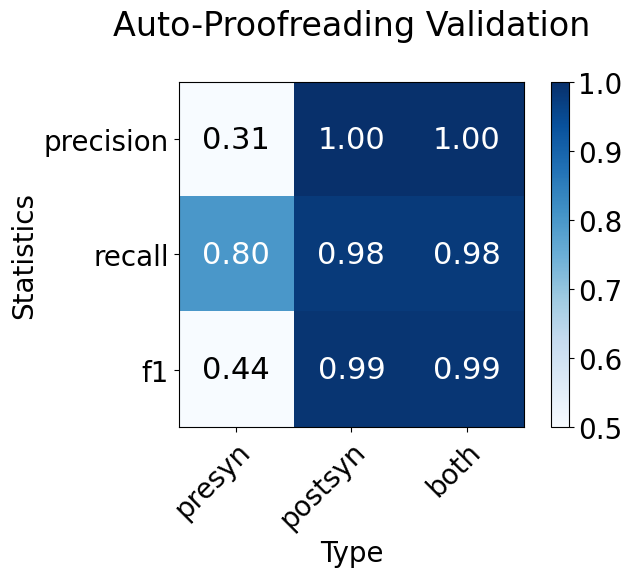

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691136008425132_validation_df.pbz2
File size is 0.076714 MB
Total time for neuron 864691136008425132: 1008.6884543895721

--- Working on Neuron 864691135865518469 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate [1313143.   484061.3  758780.6]--------
coordinate [1313143.   484061.3  758780.6] had error branches []--------
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
Apply the presyn non_error
For presyn: # valid synapses = 0, # error synapses  = 89, # error presyns = 17
For postsyn: # valid synapses = 5158, # error synapses  = 16, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 5263
n_valid_syn_ids_presyn = 0
n_errored_syn_ids_presyn = 89
n_valid_syn_ids_postsyn = 5158
n_errored_syn_ids_postsyn = 16
Segment Id = 864691135865518469
Postsyn counts:
TP:51

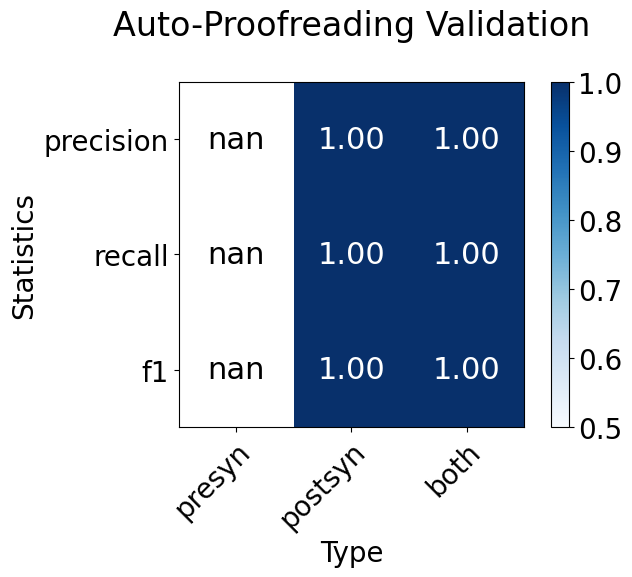

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691135865518469_validation_df.pbz2
File size is 0.105265 MB
Total time for neuron 864691135865518469: 92.01880049705505

--- Working on Neuron 864691135945413668 --
Decompressing Neuron in minimal output mode...please wait
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
Apply the presyn non_error
For presyn: # valid synapses = 0, # error synapses  = 108, # error presyns = 9
For postsyn: # valid synapses = 1536, # error synapses  = 1, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 1645
n_valid_syn_ids_presyn = 0
n_errored_syn_ids_presyn = 108
n_valid_syn_ids_postsyn = 1536
n_errored_syn_ids_postsyn = 1
Segment Id = 864691135945413668
Postsyn counts:
TP:1536
TN:1
FP:0
FN:0
Presyn counts:
TP:0
TN:99
FP:0
FN:0


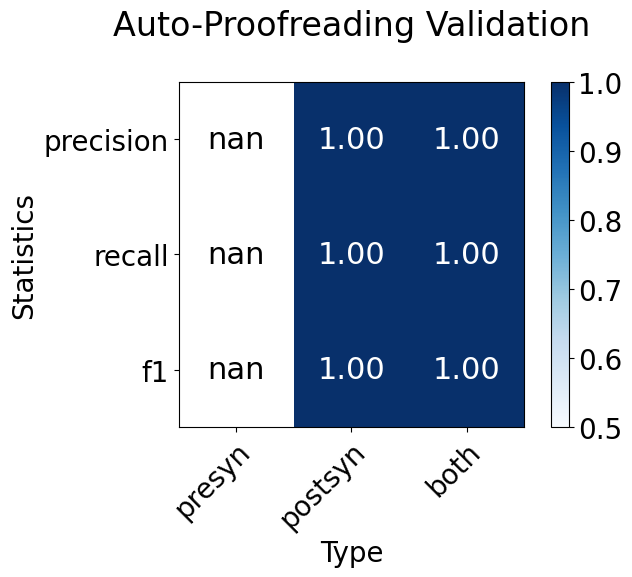

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691135945413668_validation_df.pbz2
File size is 0.03361 MB
Total time for neuron 864691135945413668: 31.616615056991577

--- Working on Neuron 864691136003930314 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate [1157985.67029235  865153.97076866  922305.84373053]--------
coordinate [1157985.67029235  865153.97076866  922305.84373053] had error branches []--------


 ----- Working on coordinate [1159164.24612675  836705.0360456   922242.31382708]--------
coordinate [1159164.24612675  836705.0360456   922242.31382708] had error branches []--------


 ----- Working on coordinate [1169801.94466494  688930.0172062   890937.06013169]--------
coordinate [1169801.94466494  688930.0172062   890937.06013169] had error branches [26, 10]--------


 ----- Working on coordinate [1172502.717746    944361.17423384  951463.84252249]--------
coordinate [1172502.717746 

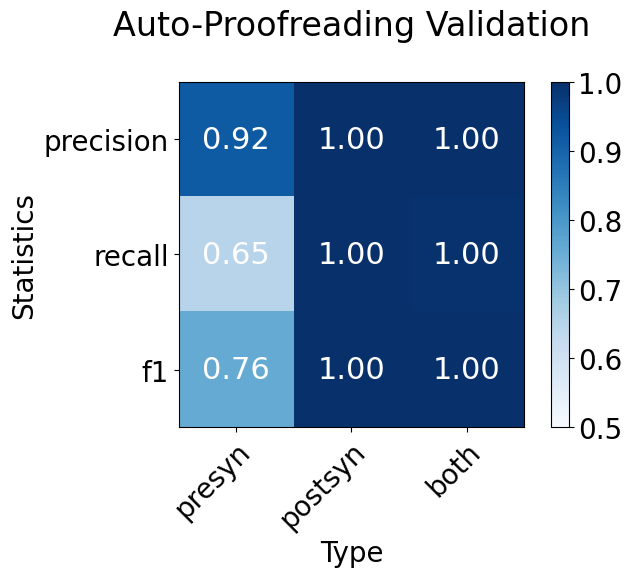

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691136003930314_validation_df.pbz2
File size is 0.080814 MB
Total time for neuron 864691136003930314: 131.22147178649902

--- Working on Neuron 864691136194042326 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate [633369.46396577 642628.37375774 904286.15810562]--------
coordinate [633369.46396577 642628.37375774 904286.15810562] had error branches []--------


 ----- Working on coordinate [655835.01357908 654071.79933467 886661.69334533]--------
coordinate [655835.01357908 654071.79933467 886661.69334533] had error branches [7, 8]--------


 ----- Working on coordinate [703150.15902442 700224.74801046 786377.94326672]--------
coordinate [703150.15902442 700224.74801046 786377.94326672] had error branches [7, 8, 10, 18]--------


 ----- Working on coordinate [705796.38338002 711368.54932521 761452.07011226]--------
coordinate [705796.38338002 711368.54

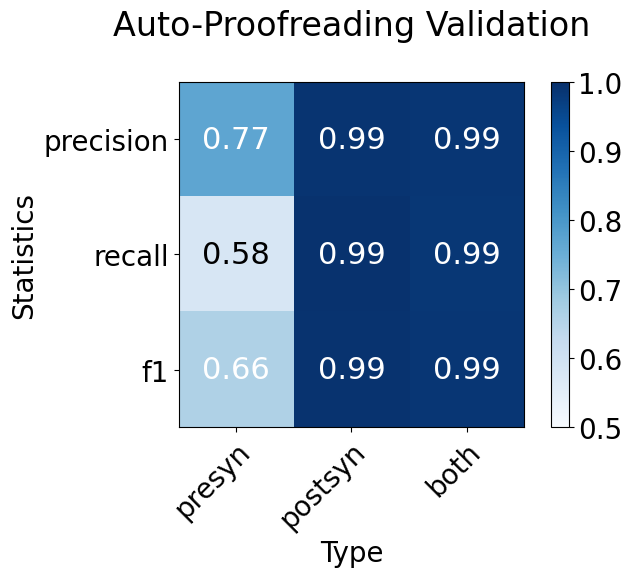

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691136194042326_validation_df.pbz2
File size is 0.069099 MB
Total time for neuron 864691136194042326: 126.20895004272461


In [9]:
for seg_id in segments_to_process:
    print(f"\n--- Working on Neuron {seg_id} --")
    st = time.time()
    
    
    #1) Dwonload the neuron object
    neuron_obj = du.fetch_neuron_obj_manual(seg_id,
                                       border_validation=True)
    
    (filt_neuron,
     return_synapse_df_revised,
    return_validation_df_revised) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                        filter_list = pru.v4_exc_filters(),
                        plot_limb_branch_filter_with_disconnect_effect = False,
                        verbose = False,
                        plot_score=False)
    
    vu.synapse_validation_df_to_score_plot(return_validation_df_revised)
    
    su.compressed_pickle(return_validation_df_revised,f"./validation_data/{seg_id}_validation_df")
    
    print(f"Total time for neuron {seg_id}: {time.time() - st}")